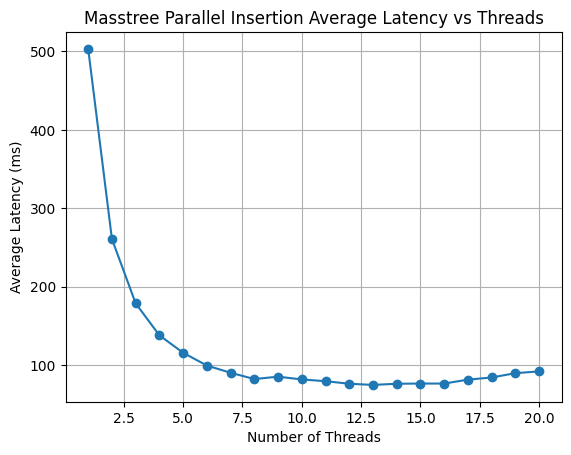

In [3]:
import subprocess
import re
import matplotlib.pyplot as plt

# Use grep to list files that contain "Running with"
result = subprocess.run("grep -l 'Running with' masstree_insert_*", shell=True, capture_output=True, text=True)
files = result.stdout.split()

data = []
for fname in files:
    with open(fname, 'r') as f:
        lines = f.readlines()
    
    # Extract thread count from the header line
    m_thread = re.search(r"Running with\s+(\d+)", lines[0])
    if not m_thread:
        continue
    thread = int(m_thread.group(1))
    
    # Extract latencies from all "Masstree Parallel Insertion:" lines in the file
    latencies = []
    for line in lines:
        m_latency = re.search(r"Masstree Parallel Insertion:\s*([0-9.]+)\s*ms", line)
        if m_latency:
            latencies.append(float(m_latency.group(1)))
    
    if latencies:
        avg_latency = sum(latencies) / len(latencies)
        data.append((thread, avg_latency))

# Sort data by thread count
data.sort(key=lambda x: x[0])
threads, avg_latencies = zip(*data)

# Plot the average latency versus the thread count
plt.plot(threads, avg_latencies, marker='o', linestyle='-')
plt.xlabel("Number of Threads")
plt.ylabel("Average Latency (ms)")
plt.title("Masstree Parallel Insertion Average Latency vs Threads")
plt.grid(True)
plt.show()

